# SVD

In [1]:
# Importing numpy
import numpy as np

# Consider an example matrix
A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)

# Measure the shape of A: which is the maximum rank?
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

The shape of A is: (10, 6).
(10, 10) (6,) (6, 6)


proof that U and VT are orthogonal matrices

In [5]:
print(np.linalg.norm(U.T @ U -np.eye(m)))
# print(VT @ VT.T)

2.234319160897194e-15


Shape of the image: (512, 512).


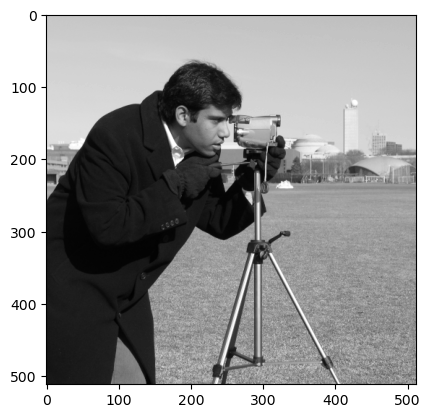

In [8]:
import skimage
import matplotlib.pyplot as plt

# Loading the "cameraman" image
x = skimage.data.camera()

# Printing its shape
print(f"Shape of the image: {x.shape}.")

# Visualize the image
plt.imshow(x, cmap="gray")
plt.show()

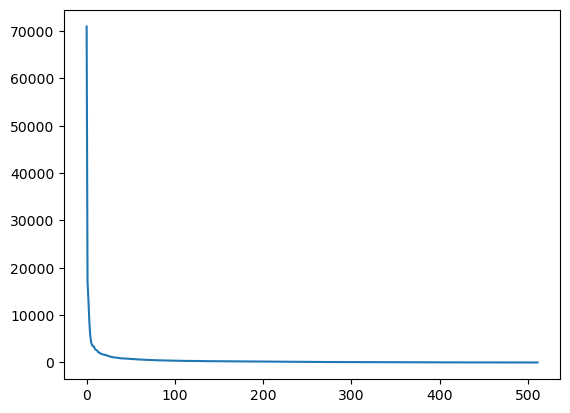

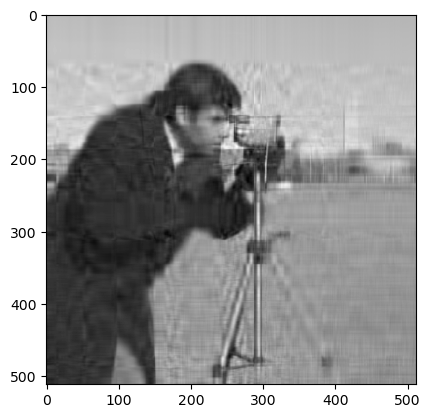

To print x the n. byte required is 20500


In [15]:
# SVD of x
U, s, VT = np.linalg.svd(x, full_matrices=True)
m, n = x.shape
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

plt.plot(s)
plt.show()

k = 20

# trouncating to the k-th singular value
Uk = U[:, :k]
Sk = S[:k, :k]
VTk = VT[:k, :]

Xk = Uk @ Sk @ VTk
plt.imshow(Xk, cmap='gray')
plt.show()

print(f"To print x the n. byte required is {k*(m+n+1)}")

# PCA

In [17]:
import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('./data/mnist_train.csv')

In [ ]:
# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
print(data.head())

In [28]:
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 42000) (42000,)


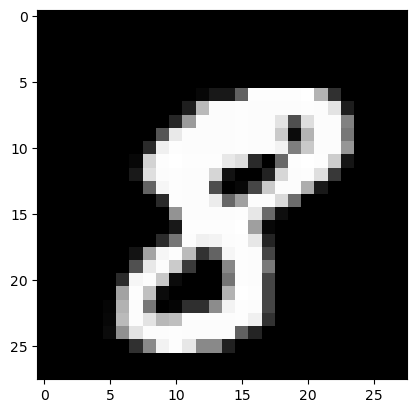

The associated digit is: 8


In [29]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [31]:
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 30_000)

print(Xtrain.shape, Xtest.shape)

(784, 30000) (784, 12000)


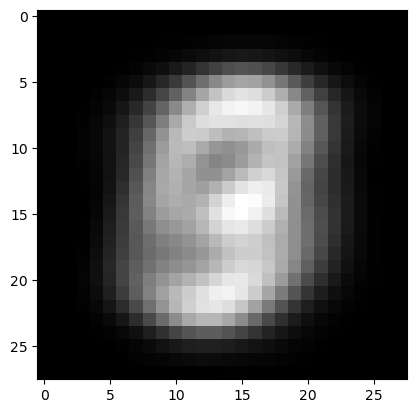

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 512)

In [ ]:
# center the data
cX = np.mean(Xtrain, axis=1)

cX = np.reshape(cX, (784, 1))

plt.imshow(np.reshape(cX, (28,28)), cmap='gray')
plt.show()

# compute cX
Xc = X - cX

# truncated version of SVD
k = 2

Uk = U[:, :k]
P = Uk.T

# project z on X
z  = P @ Xtrain

plt.scatter(z[0, :], z[1, :], c=Y)
plt.show()